### Summer cropped h1 files - daily averages

In [22]:
# import relevant packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime as dt

In [23]:
# extract data from file location for Aug - useful to have individual file for later one
aug_nc = Dataset('C:/Users/natal/Desktop/cesm_project/NC_files/2014-h1/cropped_mg17.cam.h1.2014-07-25-00000.nc', 'r')
print(aug_nc.variables.keys())    # print for reference

# create file list for relevant files
files = ['05-26', '06-25', '07-25', '08-24']

# extract data for files in file list and assign to new list (in this case, summer 2014)
summer_nc = []    # new list
for file in files:
    files_nc = Dataset('C:/Users/natal/Desktop/cesm_project/NC_files/2014-h1/cropped_mg17.cam.h1.2014-' + file + '-00000.nc', 'r')
    summer_nc.append(files_nc)
print(np.shape(summer_nc))

# change file paths to local file path

dict_keys(['lat', 'lon', 'gw', 'lev', 'hyam', 'hybm', 'P0', 'ilev', 'hyai', 'hybi', 'time', 'date', 'datesec', 'time_bnds', 'date_written', 'time_written', 'ndbase', 'nsbase', 'nbdate', 'nbsec', 'mdt', 'ndcur', 'nscur', 'co2vmr', 'ch4vmr', 'n2ovmr', 'f11vmr', 'f12vmr', 'sol_tsi', 'nsteph', 'C2H6', 'C3H8', 'CH3CHO', 'CO', 'CO2', 'GLYOXAL', 'H', 'H2', 'H2O', 'HNO3', 'HO2', 'NO', 'NO2', 'O', 'O3', 'OH', 'OMEGA', 'PAN', 'PS', 'SZA', 'T', 'U', 'V', 'Z3'])
(4,)


In [24]:
# extract time variables from first two files and assign to empty array
times = np.empty((4, 30))
count = 0
for file in summer_nc:
    time = file.variables['time'][:]
    times[count,:] = time
    count = count + 1
    
# reshape array so all times are combined
times_2 = np.reshape(times, (1, 120))

# assign dates using datetime package through all summer dates
base = dt.datetime(2013, 1, 1, 0, 0, 0)        # set base dates
dates_summer = [base + dt.timedelta(days=x) for x in times_2[0,:]]
print(np.shape(dates_summer))

(120,)


In [25]:
# extract prssure levels
lev = aug_nc.variables['lev'][:]

# assign lev index, this can be altered accordingly
# 3 different level indices have been created to compare variables at different altitudes

lev_bd = [700, 1000]    
lev_bd2 = [300, 700]  
lev_bd3 = [100, 300]  
lev_index = np.where((lev > lev_bd[0]) & (lev <= lev_bd[1]))
lev_index2 = np.where((lev > lev_bd2[0]) & (lev <= lev_bd2[1]))
lev_index3 = np.where((lev > lev_bd3[0]) & (lev <= lev_bd3[1]))

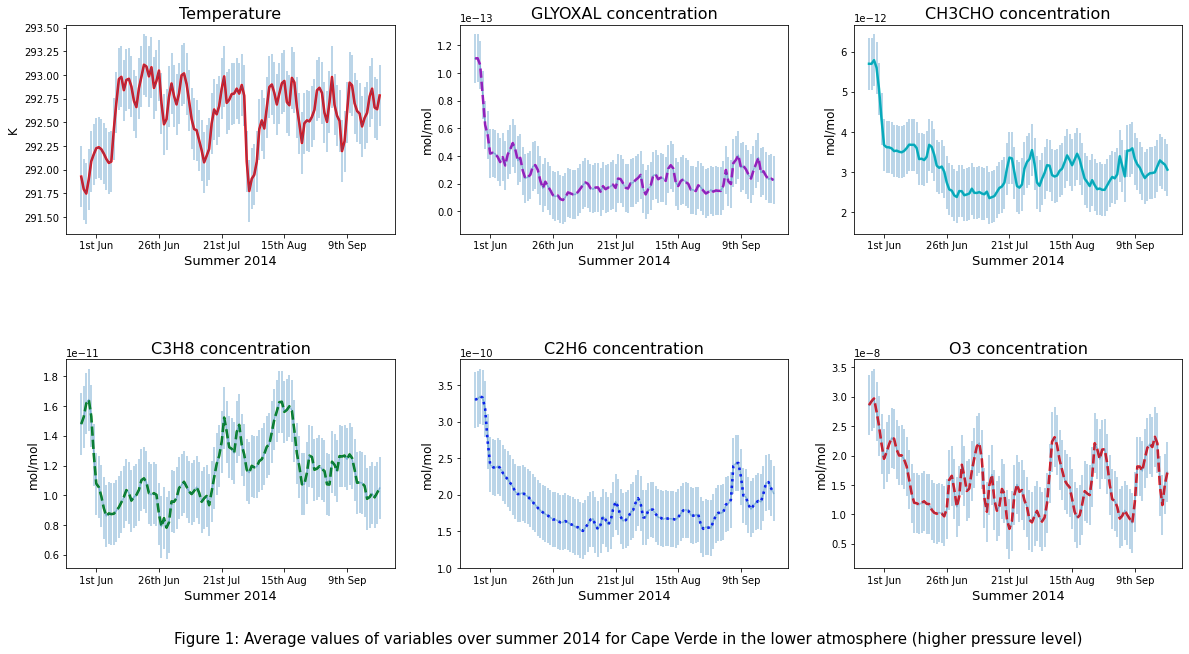

In [29]:
# compare some variables across the summer months, using level index
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

def time_series(ax, v, col):
 # create empty array for variable
    v_total = np.empty((4, 30, 17, 3, 4))
    
 # etxract data for variable in each month using for loop
    count = 0
    for file in summer_nc:
        variable = file.variables[v][:, lev_index[0], :, :] 
        v_total[count,:] = variable
        count = count + 1  
        
 # reshape so all dates are in one array
    v_summer = np.reshape(v_total, (120, 17, 3, 4)) 
    
 # calculate average values for each day (don't average over time)    
    v_mean1 = np.mean(v_summer, axis=1)   # average over levs
    v_mean2 = np.mean(v_mean1, axis=1)   # average over lats
    v_mean3 = np.mean(v_mean2, axis=1)   # average over lons
    
 #  calculate standard deviation to determine error of variable (y axis) 
    var1_std = np.std(v_mean3)

 # plot data on line plots
    ax.plot(dates_summer, v_mean3, col, linewidth=2.5)
 # add y error bar - alpha sets transparency
    ax.errorbar(dates_summer, v_mean3,  yerr=var1_std, alpha=0.4)   
    
 # set axis title and labels
    ax.set_title(aug_nc.variables[v].long_name, size=16)
    ax.set_ylabel(aug_nc.variables[v].units, size=12)
    ax.set_xticks(dates_summer[6:150:25])       
    ax.set_xticklabels(['1st Jun','26th Jun', '21st Jul', '15th Aug', '9th Sep'])
    ax.set_xlabel('Summer 2014', size=13)
    
# call the function with selected variables and line colours
time_series(ax1, 'T', 'r-')
time_series(ax2, 'GLYOXAL', 'm--')
time_series(ax3, 'CH3CHO', 'c-')
time_series(ax4, 'C3H8', 'g--')
time_series(ax5, 'C2H6', 'b:')
time_series(ax6, 'O3', 'r--')


# add figure caption
txt1='Figure 1: Average values of variables over summer 2014 for Cape Verde in the lower atmosphere (higher pressure level)'
fig.text(.2, .02, txt1, size=15)

# Glyoxal has a similar profile to acetaldehyde (CH3CHO) and ethane (C2H6)
# There are also some similarities with propane (C3H8) and ozone (O3)
# The diurnal cycles are also obvious in the plots, these will be investigated next

plt.savefig('/Users/natal/Desktop/Jupyter_Spyder_files/Outputs8/Figure1.png', dpi=300)  

plt.show()

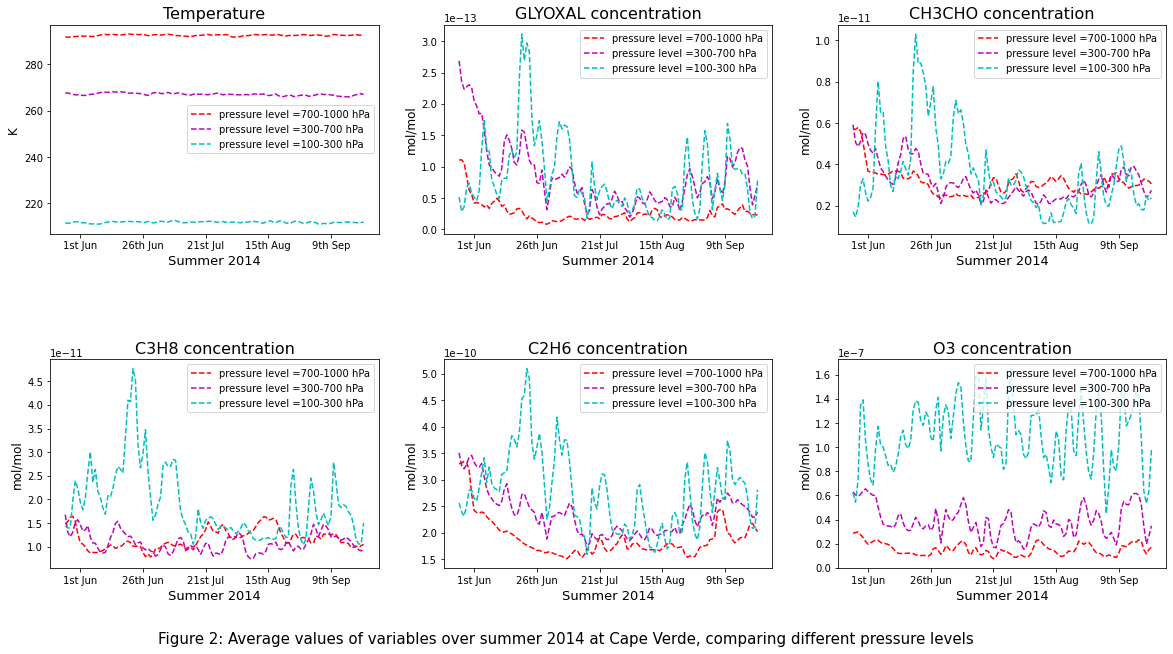

In [30]:
# compare some variables across the summer months, using three level indices, to compare different levels of the atmosphere
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
plt.subplots_adjust(hspace=0.6, wspace=0.2)     # adjust space between plots

def time_series(ax, v):  
 # create empty arrays for each variable
    v_total = np.empty((4, 30, 17, 3, 4))
    v_total2 = np.empty((4, 30, 11, 3, 4))
    v_total3 = np.empty((4, 30, 7, 3, 4))
    
 # create for loop to extract data for same variable at different pressure levels
    count = 0
    for file in summer_nc:
        variable = file.variables[v][:, lev_index[0], :, :] 
        variable2 = file.variables[v][:, lev_index2[0], :, :] 
        variable3= file.variables[v][:, lev_index3[0], :, :] 
        v_total[count,:] = variable
        v_total2[count,:] = variable2
        v_total3[count,:] = variable3
        count = count + 1  
        
 # reshape so all dates are in one array per variable
    v_summer = np.reshape(v_total, (120, 17, 3, 4)) 
    v_summer2 = np.reshape(v_total2, (120, 11, 3, 4)) 
    v_summer3 = np.reshape(v_total3, (120, 7, 3, 4)) 
    
 # calculate averages over time series for each variable
 # be careful when namin thhe variables here
    v_mean1 = np.mean(v_summer, axis=1)   # average over levs
    v_mean2 = np.mean(v_mean1, axis=1)   # average over lats
    v_mean3 = np.mean(v_mean2, axis=1)   # average over lons
    
    v2_mean1 = np.mean(v_summer2, axis=1)   # average over levs
    v2_mean2 = np.mean(v2_mean1, axis=1)   # average over lats
    v2_mean3 = np.mean(v2_mean2, axis=1)   # average over lons
    
    v3_mean1 = np.mean(v_summer3, axis=1)   # average over levs
    v3_mean2 = np.mean(v3_mean1, axis=1)   # average over lats
    v3_mean3 = np.mean(v3_mean2, axis=1)    # average over lons

 # plot the data on axes and set legend lavels
    ax.plot(dates_summer, v_mean3, 'r--', label='pressure level =700-1000 hPa')
    ax.plot(dates_summer, v2_mean3, 'm--', label='pressure level =300-700 hPa')
    ax.plot(dates_summer, v3_mean3, 'c--', label='pressure level =100-300 hPa')
    ax.legend()
    
 # set axis titles and labels
    ax.set_title(aug_nc.variables[v].long_name, size=16)
    ax.set_ylabel(aug_nc.variables[v].units, size=12)
    ax.set_xticks(dates_summer[6:150:25])        
    ax.set_xticklabels(['1st Jun','26th Jun', '21st Jul', '15th Aug', '9th Sep'])
    ax.set_xlabel('Summer 2014', size=13)
    
# call the function with selected variables and line colours
time_series(ax1, 'T')  
time_series(ax2, 'GLYOXAL')  
time_series(ax3, 'CH3CHO') 
time_series(ax4, 'C3H8')  
time_series(ax5, 'C2H6') 
time_series(ax6, 'O3')  


# add figure caption
txt2='Figure 2: Average values of variables over summer 2014 at Cape Verde, comparing different pressure levels'
fig.text(.2, .02, txt2, size=15)

plt.savefig('/Users/natal/Desktop/Jupyter_Spyder_files/Outputs8/Figure2.png', dpi=300)     # change this to relevant location

# glyoxal concentration is higher at different pressure levels (lower pressure = higher in atmosphere (and colder)), 
# this may be useful at a later stage, and it implies that the removal processes of glyoxal are more dominant at higher temperatures

plt.show()